# Nigeria Project

1. How many children under the age of five were tested for malaria with a blood smear test?
2. How many children under the age of five were tested for malaria with a rapid test?
3. How many children tested positive for malaria with a microscopy?
4. How many children tested positive for malaria with a rapid test?
5. Make a plot showing the number of U5 children that tested positive for malaria by microscopy and the number of U5 children that tested negative for malaria by microscopy in urban and rural areas
6. Make another plot showing the proportion of U5 children that tested positive for malaria by microscopy and the proportion of U5 children that tested negative for malaria by microscopy in urban and rural areas
7. Make a map of the number of children that tested positive for malaria by state
8. Identify any website of your choice and scrub their data. Pull it into a csv and make at least one data visualization.

In [2]:
import pandas as pd
import numpy as np

# Read in the data file
dtafile = r'C:\Users\Sam\Documents\Python Scripts\Nigeria project 7-18-24\NGPR7AFL.dta'
df = pd.read_stata(dtafile)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188010 entries, 0 to 188009
Columns: 357 entries, hhid to hdis9
dtypes: category(280), float64(37), int16(11), int32(5), int8(19), object(5)
memory usage: 129.5+ MB


In [3]:
df.head(5)

,hhid,hvidx,hv000,hv001,hv002,hv003,hv004,hv005,hv006,hv007,...,idxdis,hdis1,hdis2,hdis3,hdis4,hdis5,hdis6,hdis7,hdis8,hdis9
0,1 1,1,NG7,1,1,1,1,1368354,9,2018,...,1,yes,some difficulty,no,no difficulty hearing,no difficulty communicating,some difficulty,some difficulty,some difficulty,some difficulty
1,1 1,2,NG7,1,1,1,1,1368354,9,2018,...,2,no,no difficulty seeing,no,no difficulty hearing,no difficulty communicating,no difficulty remembering/concentrating,no difficulty walking or climbing,no difficulty washing or dressing,no difficulty
2,1 1,3,NG7,1,1,1,1,1368354,9,2018,...,3,no,no difficulty seeing,no,no difficulty hearing,no difficulty communicating,no difficulty remembering/concentrating,no difficulty walking or climbing,no difficulty washing or dressing,no difficulty
3,1 1,4,NG7,1,1,1,1,1368354,9,2018,...,4,no,no difficulty seeing,no,no difficulty hearing,no difficulty communicating,no difficulty remembering/concentrating,no difficulty walking or climbing,no difficulty washing or dressing,no difficulty
4,1 1,5,NG7,1,1,1,1,1368354,9,2018,...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Let's reformat the column names to match the data dictionary.
# Read in actual names for column abbreviations
nfofile = open("C:\\Users\Sam\Documents\Python Scripts\\Nigeria project 7-18-24\\NGPR7AFL.DO", "r")
data = nfofile.readlines()
print(data[0:5])

# Truncate unnecessary data from each line
for i in range(len(data)):
    x = data[i]
    x = x[:-2] # remove trailing "\n
    x = x[x.find("\""):] # remove everything up to the initial " character
    x = x[1:] # remove initial "
    data[i] = x
    
print(data[0:5])

# name data looks like it's between 3 and 359
data = data[2:359]
print(data[:5])
print(len(data)) # length of list of column names
print(len(df.columns)) # length of number of columns

# Rename columns
df.columns = data
df.info()
df.head(5)

['infix using "C:\\COUNTRIES\\NG7A\\NGPR7AFL.dct"\n', '\n', 'label variable hhid     "Case Identification"\n', 'label variable hvidx    "Line number"\n', 'label variable hv000    "Country code and phase"\n']
['C:\\COUNTRIES\\NG7A\\NGPR7AFL.dct', '', 'Case Identification', 'Line number', 'Country code and phase']
['Case Identification', 'Line number', 'Country code and phase', 'Cluster number', 'Household number']
357
357
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188010 entries, 0 to 188009
Columns: 357 entries, Case Identification to Highest degree of difficulty for any of the impairments
dtypes: category(280), float64(37), int16(11), int32(5), int8(19), object(5)
memory usage: 129.5+ MB


,Case Identification,Line number,Country code and phase,Cluster number,Household number,Respondent's line number (answering Household questionnaire),Ultimate area unit,Household sample weight (6 decimals),Month of interview,Year of interview,...,Index to household schedule,Wear glasses or contact lenses,Have difficulty seeing,Wear a hearing aid,Have difficulty hearing,Have difficulty communicating using usual language,Have difficulty remembering or concentrating,Have difficulty walking or climbing steps,Have difficulty washing all over or dressing,Highest degree of difficulty for any of the impairments
0,1 1,1,NG7,1,1,1,1,1368354,9,2018,...,1,yes,some difficulty,no,no difficulty hearing,no difficulty communicating,some difficulty,some difficulty,some difficulty,some difficulty
1,1 1,2,NG7,1,1,1,1,1368354,9,2018,...,2,no,no difficulty seeing,no,no difficulty hearing,no difficulty communicating,no difficulty remembering/concentrating,no difficulty walking or climbing,no difficulty washing or dressing,no difficulty
2,1 1,3,NG7,1,1,1,1,1368354,9,2018,...,3,no,no difficulty seeing,no,no difficulty hearing,no difficulty communicating,no difficulty remembering/concentrating,no difficulty walking or climbing,no difficulty washing or dressing,no difficulty
3,1 1,4,NG7,1,1,1,1,1368354,9,2018,...,4,no,no difficulty seeing,no,no difficulty hearing,no difficulty communicating,no difficulty remembering/concentrating,no difficulty walking or climbing,no difficulty washing or dressing,no difficulty
4,1 1,5,NG7,1,1,1,1,1368354,9,2018,...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1. How many children under the age of five were tested for malaria with a blood smear test?

In [6]:
# Need to change to Age in months (for children) < 60

# df where 'Final result of malaria from blood smear test' is a valid result and 'Number of children 5 and under (de jure)' is above zero
print("Categories for malaria blood smear test: ")
print(df["Final result of malaria from blood smear test"].unique())
print("\n")
print("Categories for Age in months (for children): ")
print(df["Age in months (for children)"].unique())
print("\n")
print(df["Final result of malaria from blood smear test"].info()) # 188010, 8144 non-null
# print(sum(df["Age in months (for children)"] < 60)) # 11590

# questionOne = ((df["Final result of malaria from blood smear test"].notna()) & (df["Age in months (for children)"] < 60)).sum()
questionOne = ((df["Final result of malaria from blood smear test"].notna()) & (df["Age in months (for children)"] < 60)).sum()
print("\n")
print("Number of children under five tested for malaria with a blood smear test: ")
print(questionOne)


## Trying a slightly different method again to check
# methodTwoQ1 = df[(df["Final result of malaria from blood smear test"].notna()) & (df["Age in months (for children)"] < 60)]
# methodTwoQ1.shape # 8144

Categories for malaria blood smear test: 
[NaN, 'negative', 'positive']
Categories (2, object): ['negative' < 'positive']


Categories for Age in months (for children): 
[nan 30. 21. 23. 11. 17. 59. 19. 45. 54. 25. 50. 39. 15. 48. 37. 56. 14.
 53. 42. 18.  6. 22. 34. 43. 12. 33. 10. 35. 58. 49. 46. 27. 52. 26. 32.
 55. 40. 24.  9. 41. 38. 44. 28. 47. 57. 36. 51. 16. 31. 13. 29.  7.  8.
 20.]


<class 'pandas.core.series.Series'>
RangeIndex: 188010 entries, 0 to 188009
Series name: Final result of malaria from blood smear test
Non-Null Count  Dtype   
--------------  -----   
8144 non-null   category
dtypes: category(1)
memory usage: 183.8 KB
None


Number of children under five tested for malaria with a blood smear test: 
8144


In [7]:
# trying out a slightly different method
testDF = df[["Age in months (for children)", "Final result of malaria from blood smear test"]]
testDF = testDF.dropna(how="all") # remove rows that have all columns filled with NaN
testDF.info()
testDF.head() # different method, still 8144

<class 'pandas.core.frame.DataFrame'>
Index: 11590 entries, 24 to 187998
Data columns (total 2 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Age in months (for children)                   11590 non-null  float64 
 1   Final result of malaria from blood smear test  8144 non-null   category
dtypes: category(1), float64(1)
memory usage: 192.5 KB


,Age in months (for children),Final result of malaria from blood smear test
24,30.0,NaN
46,21.0,negative
55,23.0,negative
63,11.0,negative
87,17.0,negative


2. How many children under the age of five were tested for malaria with a rapid test?

In [9]:
# print(sum(df["Result of malaria rapid test"].notna())) # 11197
questionTwo = ((df["Result of malaria rapid test"].notna()) & (df["Number of children 5 and under (de jure)"].astype('int') > 0)).sum()

print("Number of children under five tested for malaria with a rapid test: ")
print(questionTwo)

Number of children under five tested for malaria with a rapid test: 
11063


In [10]:
# print(sum(df["Result of malaria rapid test"].notna())) # 11197
# print(sum(df["Age in months (for children)"].notna())) # 11590
questionTwo = ((df["Result of malaria rapid test"].notna()) & (df["Age in months (for children)"] < 60)).sum()

print("Number of children under five tested for malaria with a rapid test: ")
print(questionTwo)

Number of children under five tested for malaria with a rapid test: 
11197


3. How many children tested positive for malaria with a microscopy?

In [12]:
# df where "Eligibility for biomarkers" = 1 & "Age in months (for children)" is nonzero
# print(df["Age in months (for children)"].unique())
print("Number of children in cohort: ")
print(sum(df["Age in months (for children)"].notna())) # 11590
# print("\n")
# print("Categories for Eligibility for biomarkers: ")
# print(df["Eligibility for biomarkers"].unique())

questionThree = ((df["Age in months (for children)"].notna()) & (df["Eligibility for biomarkers"] == "yes, selected for microscopy")).sum()
print("\n")
print("Number of children that tested positive for malaria with a microscopy: ")
print(questionThree)

Number of children in cohort: 
11590


Number of children that tested positive for malaria with a microscopy: 
8479


4. How many children tested positive for malaria with a rapid test?

In [14]:
print("Categories for Result of malaria rapid test:")
print(df["Result of malaria rapid test"].unique())
print("\n")
print("Number of positives with rapid test: ")
print((df["Result of malaria rapid test"] == "positive").sum())

questionFour = ((df["Age in months (for children)"].notna()) & (df["Result of malaria rapid test"] == "positive")).sum()
print("Number of children positive for malaria rapid test:")
print(questionFour)

## trying a slightly different method to check
#print("\n")
#q4method2 = df[(df["Age in months (for children)"].notna()) & (df["Result of malaria rapid test"] == "positive")]
#q4method2.shape # (4258, 357) # same as before

Categories for Result of malaria rapid test:
[NaN, 'negative', 'positive']
Categories (2, object): ['negative' < 'positive']


Number of positives with rapid test: 
4258
Number of children positive for malaria rapid test:
4258


5. Make a plot showing the number of U5 children that tested positive for malaria by microscopy and the number of U5 children that tested negative for malaria by microscopy in urban and rural areas

In [16]:
# Assuming U5 means under 5 years of age

print(df["Type of place of residence"].unique())
print(df["Eligibility for biomarkers"].unique())
print("\n")
# print((df["Eligibility for biomarkers"]).info()) # 188010 total entries, as usual
# print((df["Eligibility for biomarkers"] == "yes, selected for microscopy").sum()) # 49658

# Setting up variables for graph
positiveUrban = (
    sum(((df["Age in months (for children)"] < 60) & (df["Eligibility for biomarkers"] == "yes, selected for microscopy") 
     & (df["Final result of malaria from blood smear test"] == "positive") & (df["Type of place of residence"] == "urban")))
)
print("Positive, urban:" + str(positiveUrban))

negativeUrban = (
    sum(((df["Age in months (for children)"] < 60) & (df["Eligibility for biomarkers"] == "yes, selected for microscopy") 
     & (df["Final result of malaria from blood smear test"] == "negative") & (df["Type of place of residence"] == "urban")))
)
print("Negative, urban:" + str(negativeUrban))

positiveRural = (
    sum(((df["Age in months (for children)"] < 60) & (df["Eligibility for biomarkers"] == "yes, selected for microscopy") 
     & (df["Final result of malaria from blood smear test"] == "positive") & (df["Type of place of residence"] == "rural")))
)
print("Positive, rural:" + str(positiveRural))

negativeRural = (
    sum((((df["Age in months (for children)"] < 60) & (df["Eligibility for biomarkers"] == "yes, selected for microscopy") 
     & (df["Final result of malaria from blood smear test"] == "negative") & (df["Type of place of residence"] == "rural"))))
)
print("Negative, rural:" + str(negativeRural))



['urban', 'rural']
Categories (2, object): ['urban' < 'rural']
['no biomarker sample collection', 'yes, selected for microscopy', 'yes, selected for dbs']
Categories (3, object): ['yes, selected for microscopy' < 'yes, selected for dbs' < 'no biomarker sample collection']


Positive, urban:506
Negative, urban:2921
Positive, rural:1430
Negative, rural:3287


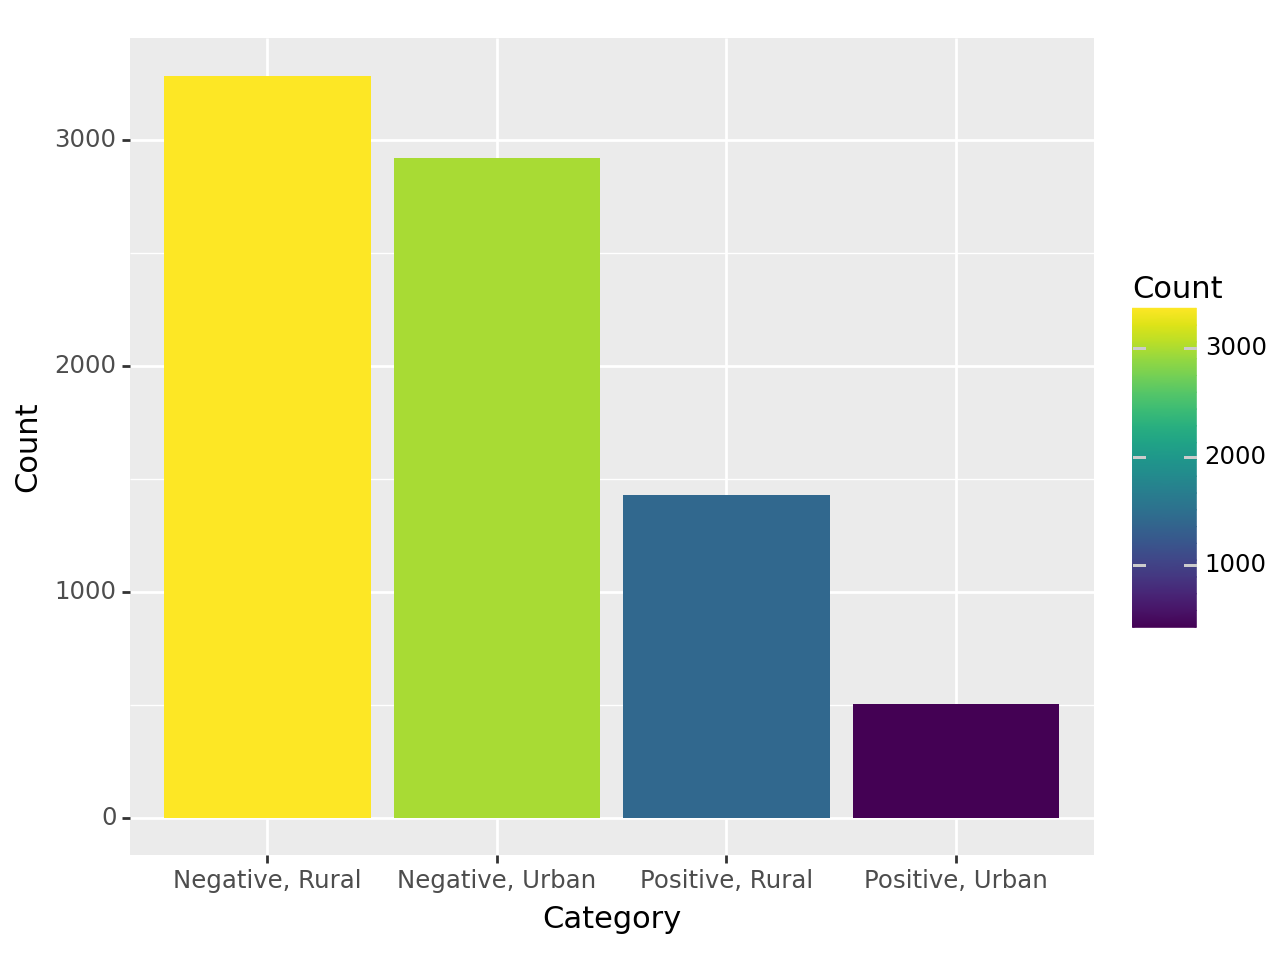

<Figure Size: (640 x 480)>

In [96]:
# Graphing with plotnine
from plotnine import *


q5data = {
    'Category': ['Positive, Urban', 'Negative, Urban', 'Positive, Rural', "Negative, Rural"],
    'Count': [506, 2921, 1430, 3287]
}

graphData = pd.DataFrame(q5data)
#graphData.info() #looks good.

(
ggplot(graphData, aes(x='Category', y='Count', fill="Count")) +
    geom_bar(stat='identity')
)

6. Make another plot showing the proportion of U5 children that tested positive for malaria by microscopy and the proportion of U5 children that tested negative for malaria by microscopy in urban and rural areas?

In [29]:
# Assuming again that U5 means under 5 years of age
q6data = df[["Age in months (for children)", "Eligibility for biomarkers", "Final result of malaria from blood smear test", "Type of place of residence"]]
q6dataDummy_smearTest = df["Final result of malaria from blood smear test"].str.get_dummies()

q6dataDummy_residence = df["Type of place of residence"].str.get_dummies()
q6dataDummy_biomarker = df["Eligibility for biomarkers"].str.get_dummies()
q6dataDummy = pd.concat([q6data, q6dataDummy_smearTest, q6dataDummy_residence, q6dataDummy_biomarker], axis=1)
q6dataDummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188010 entries, 0 to 188009
Data columns (total 12 columns):
 #   Column                                         Non-Null Count   Dtype   
---  ------                                         --------------   -----   
 0   Age in months (for children)                   11590 non-null   float64 
 1   Eligibility for biomarkers                     188010 non-null  category
 2   Final result of malaria from blood smear test  8144 non-null    category
 3   Type of place of residence                     188010 non-null  category
 4   nan                                            188010 non-null  int64   
 5   negative                                       188010 non-null  int64   
 6   positive                                       188010 non-null  int64   
 7   rural                                          188010 non-null  int64   
 8   urban                                          188010 non-null  int64   
 9   no biomarker sample collec

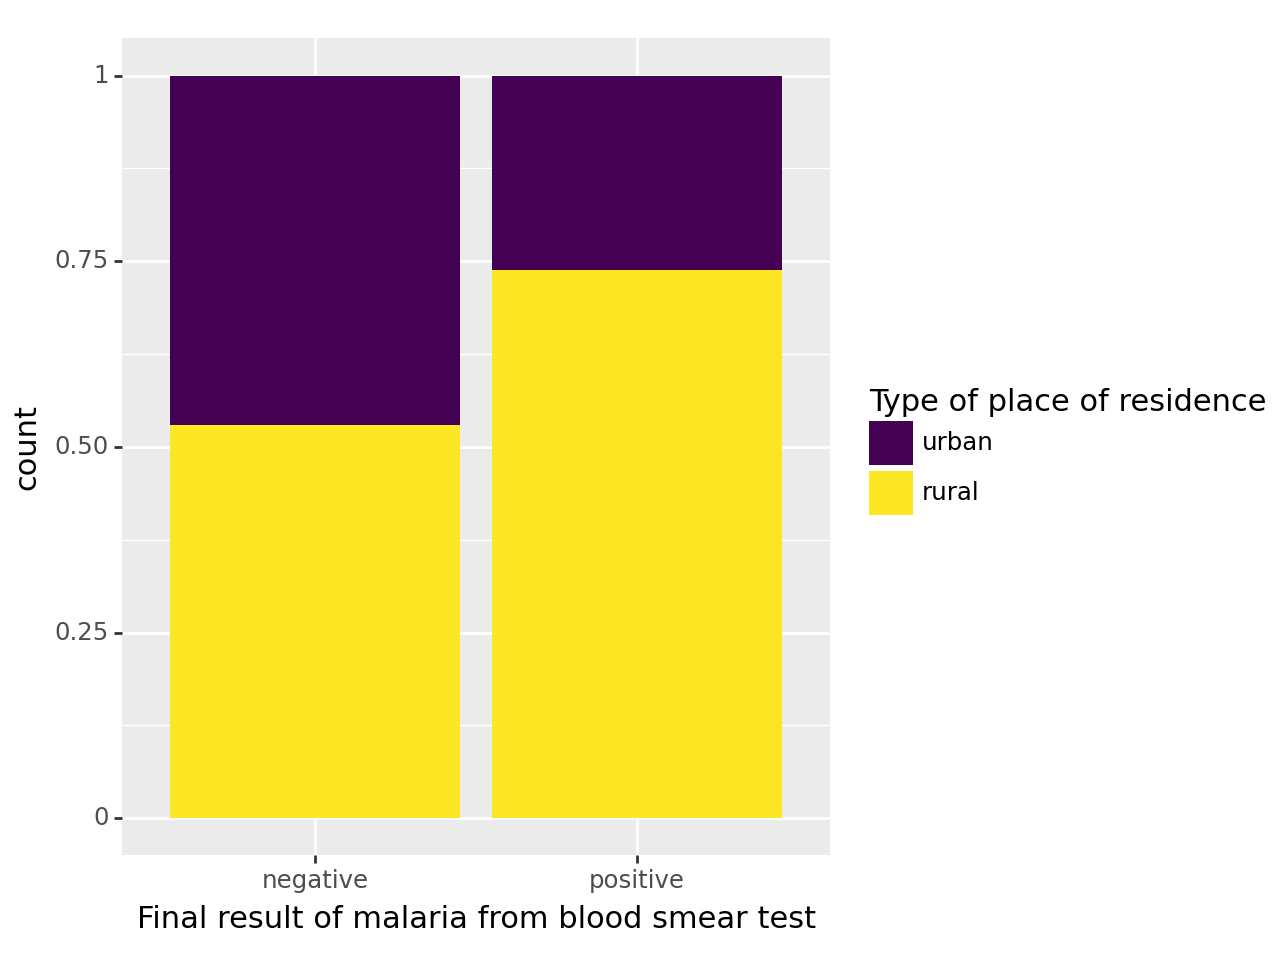

<Figure Size: (640 x 480)>

In [75]:
# graphing
graph6_urbpos = q6dataDummy[["Final result of malaria from blood smear test", "Type of place of residence"]]
graph6_urbpos = graph6_urbpos.dropna(how="any")
(ggplot(graph6_urbpos, aes("Final result of malaria from blood smear test", fill="Type of place of residence")) + geom_bar(position="fill"))

7. Make a map of the number of children that tested positive for malaria by state.

In [248]:
# Important variables: "State", "Age in months (for children)", "Final result of malaria from blood smear test"
df7 = df[["State", "Age in months (for children)", "Final result of malaria from blood smear test"]]
df7.info()
# need to format data into counts per state
state_list = df7["State"].unique().astype("object")
print(state_list)
state_count = []
for state in state_list:
    state_count.append((sum((df7["State"] == state) & (df7["Final result of malaria from blood smear test"] == "positive"))))

print(state_count)
print(len(state_count)) #matches

# Need to capitalize and change 'fct abuja' to match geojson data
for i in (range(len(state_list))): 
    state_list[i] = state_list[i].capitalize()
state_list[1] = "Fct, Abuja"
print("List of Nigerian States:")
print(state_list)

df7ForGraph = pd.DataFrame({
    "State":state_list,
    "Count":state_count
})
df7ForGraph.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188010 entries, 0 to 188009
Data columns (total 3 columns):
 #   Column                                         Non-Null Count   Dtype   
---  ------                                         --------------   -----   
 0   State                                          188010 non-null  category
 1   Age in months (for children)                   11590 non-null   float64 
 2   Final result of malaria from blood smear test  8144 non-null    category
dtypes: category(2), float64(1)
memory usage: 1.8 MB
['benue' 'fct abuja' 'kogi' 'kwara' 'nasarawa' 'niger' 'plateau' 'adamawa'
 'bauchi' 'borno' 'gombe' 'taraba' 'yobe' 'jigawa' 'kaduna' 'kano'
 'katsina' 'kebbi' 'sokoto' 'zamfara' 'abia' 'anambra' 'ebonyi' 'enugu'
 'imo' 'akwa ibom' 'bayelsa' 'cross river' 'delta' 'edo' 'rivers' 'ekiti'
 'lagos' 'ogun' 'ondo' 'osun' 'oyo']
[32, 42, 42, 35, 33, 85, 51, 43, 73, 36, 76, 50, 42, 98, 93, 119, 77, 106, 62, 89, 24, 30, 102, 32, 25, 40, 25, 21, 23, 19

,State,Count
0,Benue,32
1,"Fct, Abuja",42
2,Kogi,42
3,Kwara,35
4,Nasarawa,33


In [250]:
# Nigerian states map: "nigeria_state_boundaries_xsmall.json"
import plotly.express as px
import plotly.graph_objects as go
import json

# using geojson from https://marcusmatthias.carto.com/tables/nigeria_geojson/public/map
f = open(r"C:\Users\Sam\Documents\Python Scripts\Nigeria project 7-18-24\nigeria_geojson.geojson")
nigeria_json = json.load(f)
#print(nigeria_json) # working

fig=px.choropleth(df7ForGraph,
             geojson=nigeria_json, featureidkey="properties.state",
             locations='State',
              color='Count',
              color_continuous_scale='Inferno',
               title='Children positive for malaria',  
               height=700
              )
fig.update_geos(fitbounds="locations")
fig.show(renderer='iframe')

8. Identify any website of your choice and scrub their data. Pull it into a csv and make at least one data visualization.

In [357]:
# I'm going with one of my favorite reads, the CRPG Addict. They're attempting to play every computer RPG starting with the oldest
#  they can find and moving up in year. Currently he's working through 1993. He has a standardized rating criteria that he's used
#  across everything he's played. So I will go through the index and for all the games marked 'won' I'll download the HTML and
#  extract info on each title. 

# http://crpgaddict.blogspot.com/p/index-of-games-played-by-year.html

import requests

r = requests.get("http://crpgaddict.blogspot.com/p/index-of-games-played-by-year.html")
#print(r.text) # Works!

In [423]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(r.content, 'html.parser')

# parse through index to find entries labeled "Won"
links = soup.findAll("a", string="Won")
# print(len(wonTags)) #210 links total
print(wonTags[3])

urlList = []
for link in links:
    urlList.append(link.get("href"))

print("\n")
print(urlList[:5])
print("ok")

<a href="http://crpgaddict.blogspot.com/2013/10/swordthrust-walked-through.html">Won</a>


['http://crpgaddict.blogspot.com/2019/01/revisiting-dungeon-1975.html', 'http://crpgaddict.blogspot.com/2019/01/revisiting-game-of-dungeons-1975.html', 'https://crpgaddict.blogspot.com/2019/10/fantasyland-2041-won-with-summary-and.html', 'http://crpgaddict.blogspot.com/2013/10/swordthrust-walked-through.html', 'http://crpgaddict.blogspot.com/2010/02/ultima-won.html']
ok


In [425]:
# Now that we have a list of desired URLs, we can make a list of HTML objects with the target's text.
import time
targetText = []

for i in urlList:
    x = requests.get(i)
    targetText.append(x.text)
    time.sleep(2) # Don't hammer the website.

print(targetText[3]) # Looks like it worked.

<!DOCTYPE html>
<html class='v2' dir='ltr' xmlns='http://www.w3.org/1999/xhtml' xmlns:b='http://www.google.com/2005/gml/b' xmlns:data='http://www.google.com/2005/gml/data' xmlns:expr='http://www.google.com/2005/gml/expr'>
<head>
<link href='https://www.blogger.com/static/v1/widgets/3566091532-css_bundle_v2.css' rel='stylesheet' type='text/css'/>
<meta content='IE=EmulateIE7' http-equiv='X-UA-Compatible'/>
<meta content='width=1100' name='viewport'/>
<meta content='text/html; charset=UTF-8' http-equiv='Content-Type'/>
<meta content='blogger' name='generator'/>
<link href='http://crpgaddict.blogspot.com/favicon.ico' rel='icon' type='image/x-icon'/>
<link href='http://crpgaddict.blogspot.com/2013/10/swordthrust-walked-through.html' rel='canonical'/>
<link rel="alternate" type="application/atom+xml" title="The CRPG Addict - Atom" href="http://crpgaddict.blogspot.com/feeds/posts/default" />
<link rel="alternate" type="application/rss+xml" title="The CRPG Addict - RSS" href="http://crpgaddic

In [583]:
# Saving the data so we dont have to fetch it again in case of loss.
with open(r"C:\Users\Sam\Documents\Python Scripts\Nigeria project 7-18-24\targetText.html", "w", encoding = 'utf-8') as file: 
    # prettify the soup object and convert it into a string 
    file.write(str(soup.prettify()))

import pickle
targetTextdf = pd.DataFrame(targetText)
targetTextdf.to_pickle(r"C:\Users\Sam\Documents\Python Scripts\Nigeria project 7-18-24\targetTextdf.pkl")

In [799]:
import re

# Parse each targetText for relevant info
#print(len(targetText)) # Still 210, good.
#type(targetText[3]) # each entry is a long string

# create dataframe
crpgScores = pd.DataFrame() # empty df to hold scraped data
titleList = [None]*(len(targetText))
hoursList = [None]*(len(targetText))
diffList = [None]*(len(targetText))
rankList = [None]*(len(targetText))

# replace with range(len(targetText))
for i in range(len(targetText)):
    target = BeautifulSoup(targetText[i])
    #print(type(target)) # it's a <class 'bs4.BeautifulSoup'>
    title = target.title.string
    title = title.replace("The CRPG Addict: ", "") # trim title
    #print("Title: " + title)
    
    totalHours = target.findAll(text=re.compile("Total Hours"))
    hoursPointer = target.text.find("Total Hours: ") # returns the index of the beginning of the string specified
    hoursPlayed = target.text[hoursPointer:(hoursPointer+20)] # need to get enough characters to include the data we need
    hoursPlayed = re.sub("[^0-9]", "", hoursPlayed) # remove non-numeric characters
    #print("Hours Played: " + hoursPlayed) # works
    
    difficultyPointer = target.text.find("Difficulty: ") # returns the index of the beginning of the string specified
    difficultyScore = target.text[difficultyPointer:(difficultyPointer+50)]
    #print(difficultyScore)
    difficultyScore = difficultyScore[difficultyScore.find("(")+1:difficultyScore.find(")")] # get everything between parenthesis
    difficultyScore = difficultyScore[:-2] # remove trailing "/5"
    #print("Difficulty: " + difficultyScore) # works
    
    # finalRating
    finalRatingPointer = target.text.find("Final Rating: ") # returns the index of the beginning of the string specified
    finalRating = target.text[finalRatingPointer:(finalRatingPointer+30)]
    finalRating = re.sub("[^0-9]", "", finalRating) # remove non-numeric characters
    #print("Final Ranking: " + finalRating) # works

    # add all to lists
    titleList[i] = title
    hoursList[i] = hoursPlayed
    diffList[i] = difficultyScore
    rankList[i] = finalRating

print("Done!")

Done!


In [801]:
# put all lists into df
crpgScores.insert(0, "Title", titleList)
crpgScores.insert(1, "Hours Played", hoursList)
crpgScores.insert(2, "Difficulty", diffList)
crpgScores.insert(3, "Final Ranking", rankList)
crpgScores.head(20) # some missing values

,Title,Hours Played,Difficulty,Final Ranking
0,Revisiting: The Dungeon (1975),11,3.5,14
1,Revisiting: The Game of Dungeons (1975),44,3,18
2,Fantasyland 2041: Won! (with Summary and Rating),9,4,18
3,SwordThrust: Walked Through!,23,3.0,35
4,Ultima: Won!,8,2.0,34
5,Wizardry: Won! (Seriously!),40,4.0,37
6,Camelot: Won! (with Summary and Rating),69,3.5,36
7,Ring of Darkness: Won! (With Final Rating),9,3,25
8,Wizardry II: Won!*,26,4,32
9,Ultima III: Won!,10,2.5,51


In [721]:
# write to csv
crpgScores.to_csv("C:\\Users\Sam\Documents\Python Scripts\\Nigeria project 7-18-24\crpgScores.csv")

In [807]:
crpgScores.info() # need to convert dtypes
crpgScores["Title"] = crpgScores["Title"].astype(str)
crpgScores["Hours Played"] = pd.to_numeric(crpgScores["Hours Played"]).astype("Int64")
#crpgScores["Difficulty"] = pd.to_numeric(crpgScores["Difficulty"]).astype("Float64") # doesn't work, need to directly convert missing numbers to NaN

def float_to_nan(x):
    try:
        return np.float64(x)
    except:
        return np.nan

crpgScores["Difficulty"] = crpgScores["Difficulty"].apply(float_to_nan)

crpgScores["Final Ranking"] = pd.to_numeric(crpgScores["Final Ranking"]).astype("Int64")
crpgScores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          210 non-null    object 
 1   Hours Played   123 non-null    Int64  
 2   Difficulty     125 non-null    float64
 3   Final Ranking  126 non-null    Int64  
dtypes: Int64(2), float64(1), object(1)
memory usage: 7.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          210 non-null    object 
 1   Hours Played   123 non-null    Int64  
 2   Difficulty     125 non-null    float64
 3   Final Ranking  126 non-null    Int64  
dtypes: Int64(2), float64(1), object(1)
memory usage: 7.1+ KB


C:\Users\Sam\anaconda3\lib\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_bin : Removed 87 rows containing non-finite values.


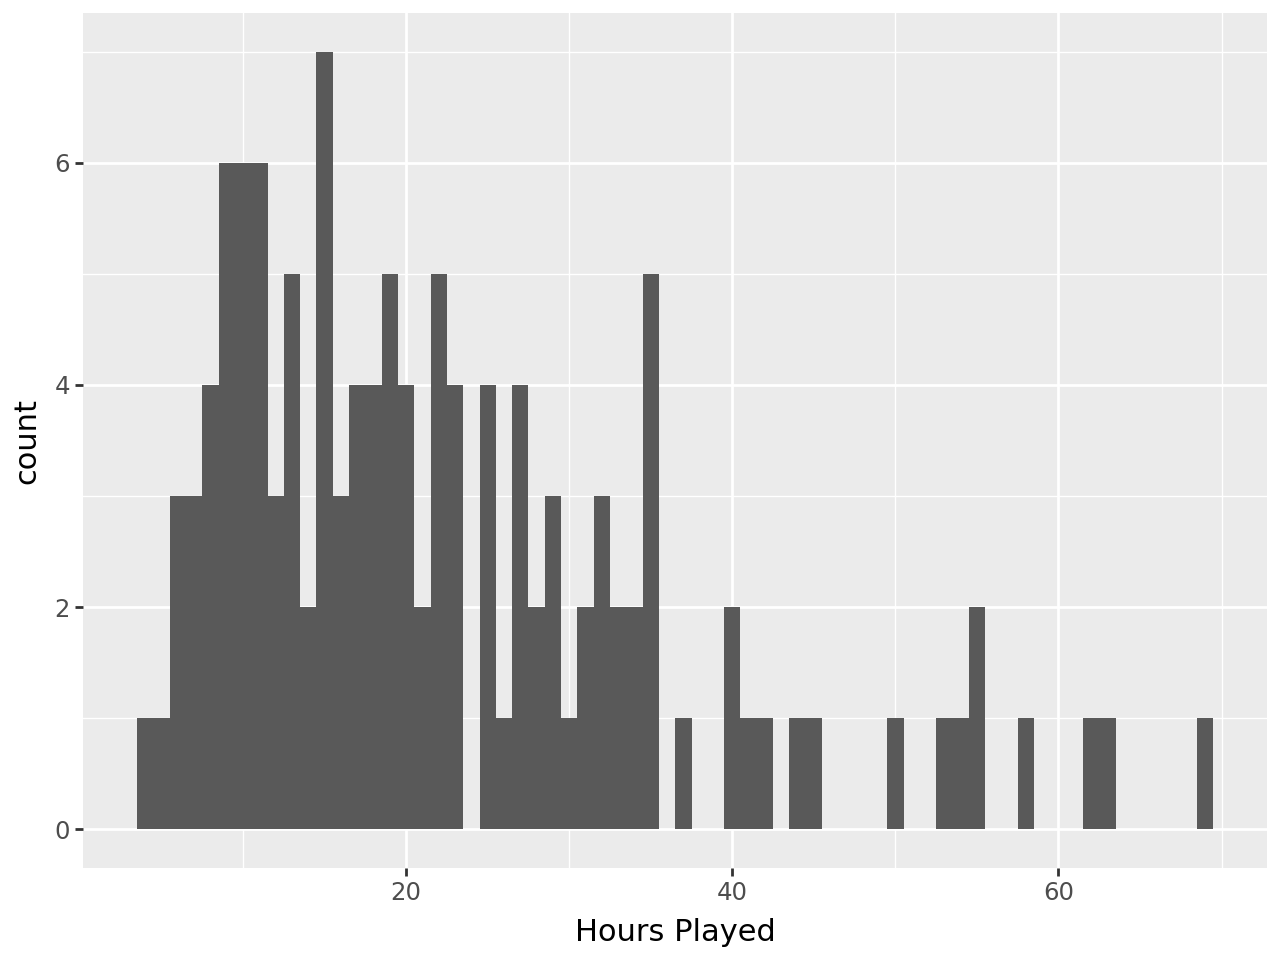

In [832]:
# graphing
(ggplot(crpgScores, aes("Hours Played")) + geom_histogram(crpgScores, binwidth=1))

C:\Users\Sam\anaconda3\lib\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_bin : Removed 85 rows containing non-finite values.


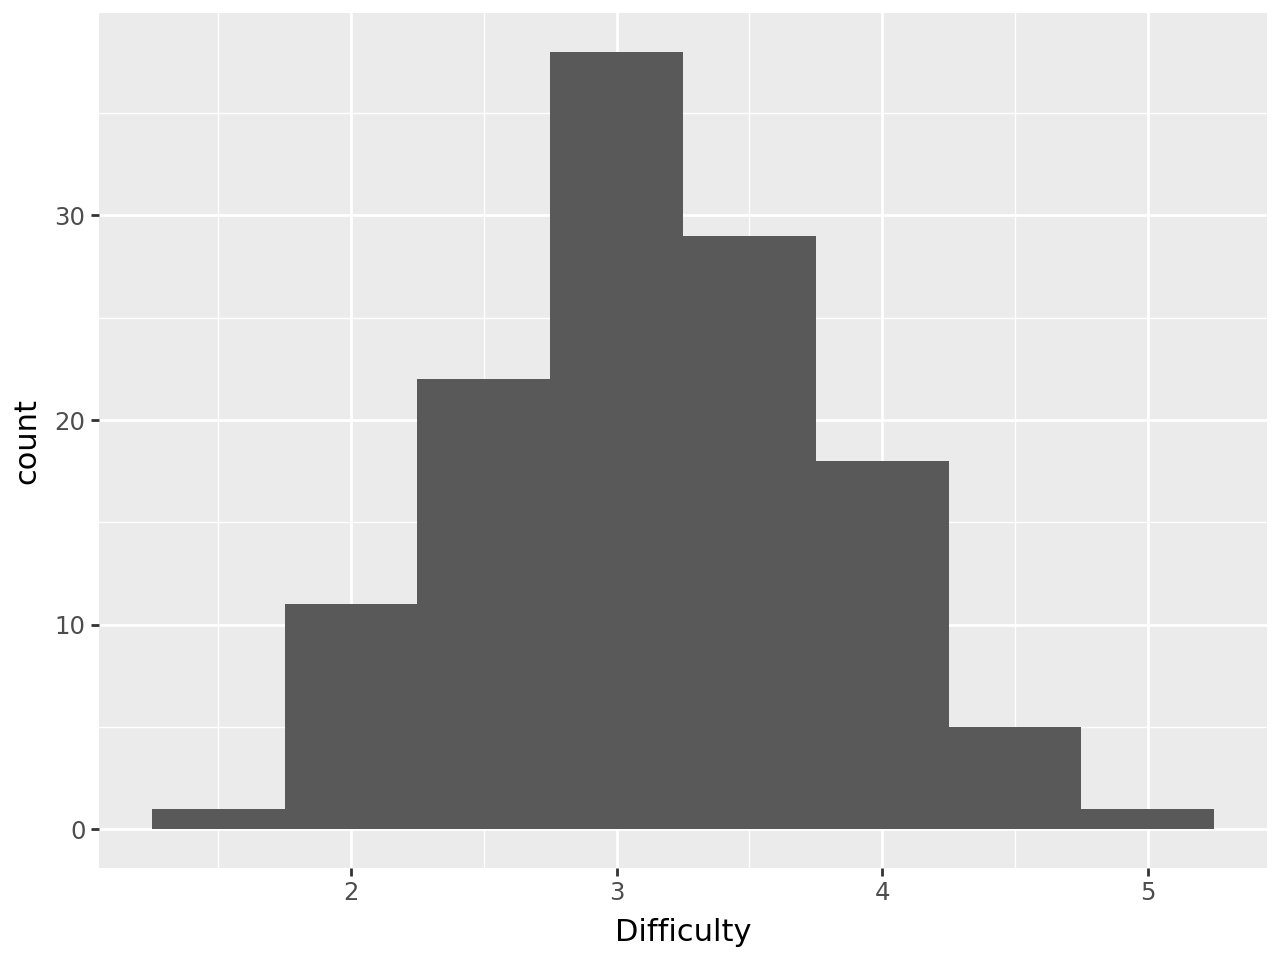

In [838]:
(ggplot(crpgScores, aes("Difficulty")) + geom_histogram(crpgScores, binwidth=0.5))

C:\Users\Sam\anaconda3\lib\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_bin : Removed 84 rows containing non-finite values.


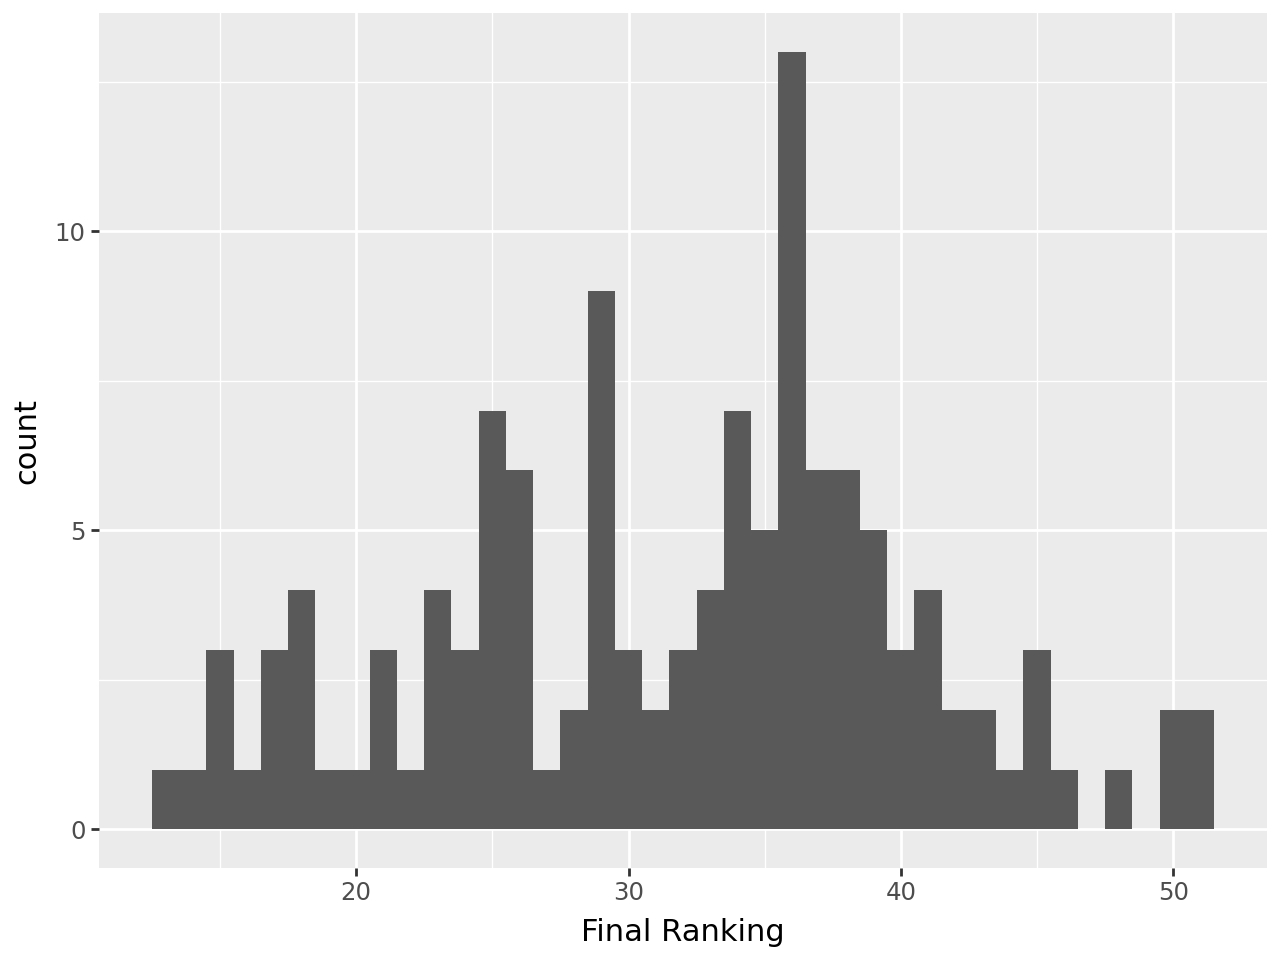

In [834]:
(ggplot(crpgScores, aes("Final Ranking")) + geom_histogram(crpgScores, binwidth=1))

C:\Users\Sam\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Sam\anaconda3\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 89 rows containing missing values.


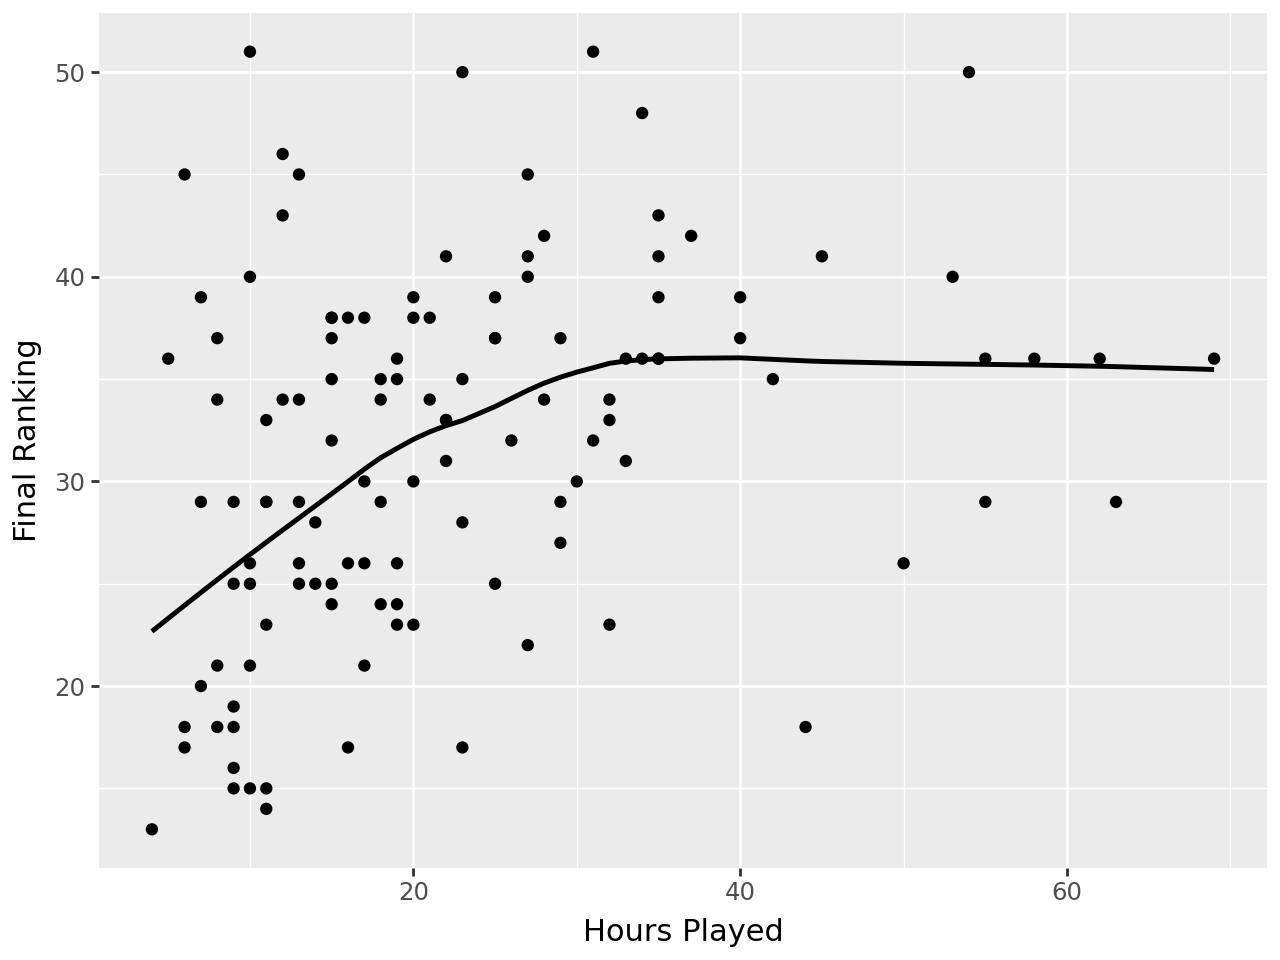

In [842]:
# let's look for correlations

(
    ggplot(crpgScores, aes(x="Hours Played", y="Final Ranking"))
    + geom_point()
    + geom_smooth()
    + labs(x="Hours Played", y="Final Ranking")
)

C:\Users\Sam\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Sam\anaconda3\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 87 rows containing missing values.


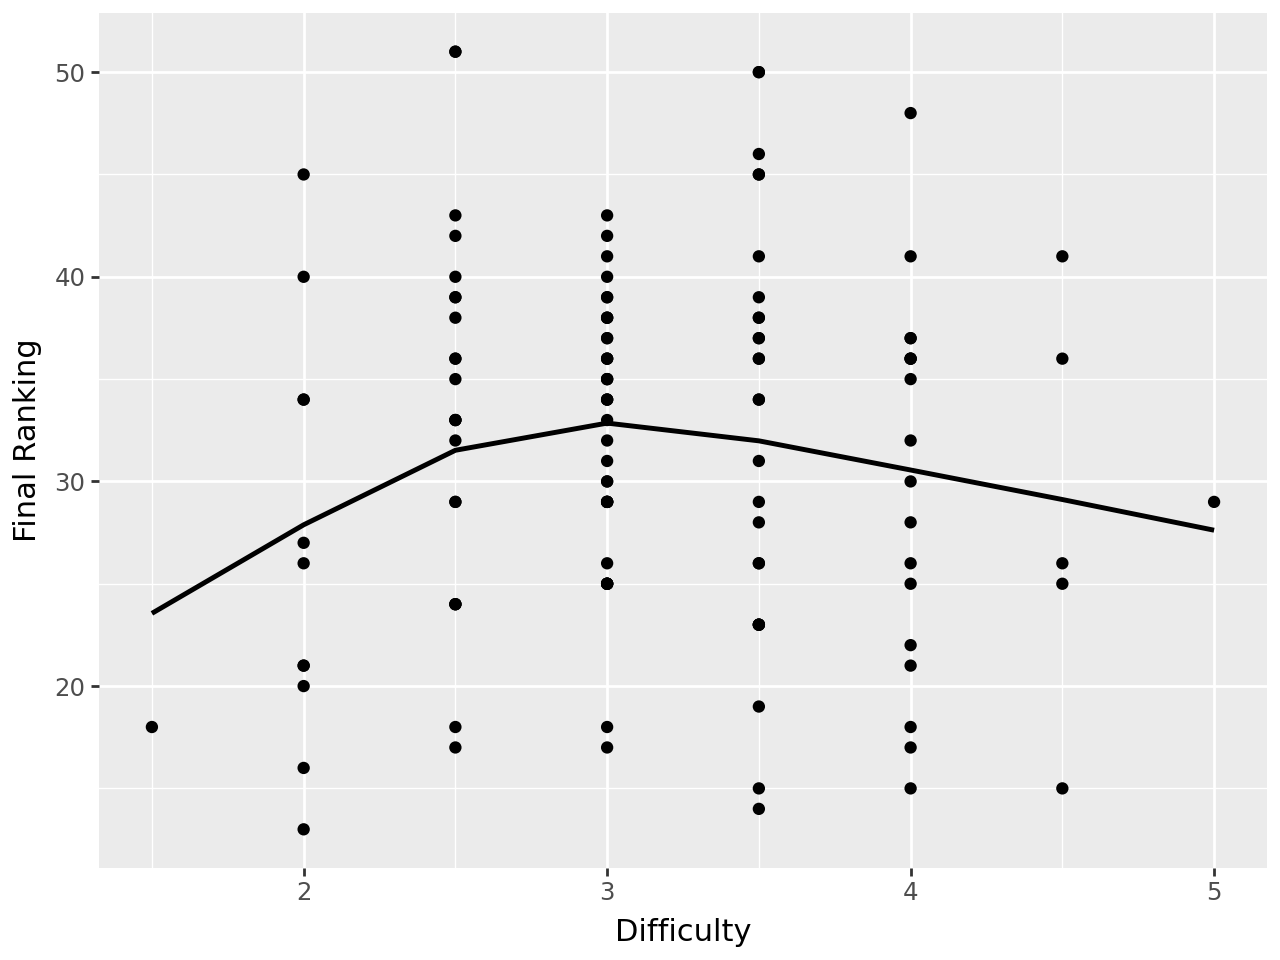

In [844]:
(
    ggplot(crpgScores, aes(x="Difficulty", y="Final Ranking"))
    + geom_point()
    + geom_smooth()
    + labs(x="Difficulty", y="Final Ranking")
)

C:\Users\Sam\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Sam\anaconda3\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 87 rows containing missing values.


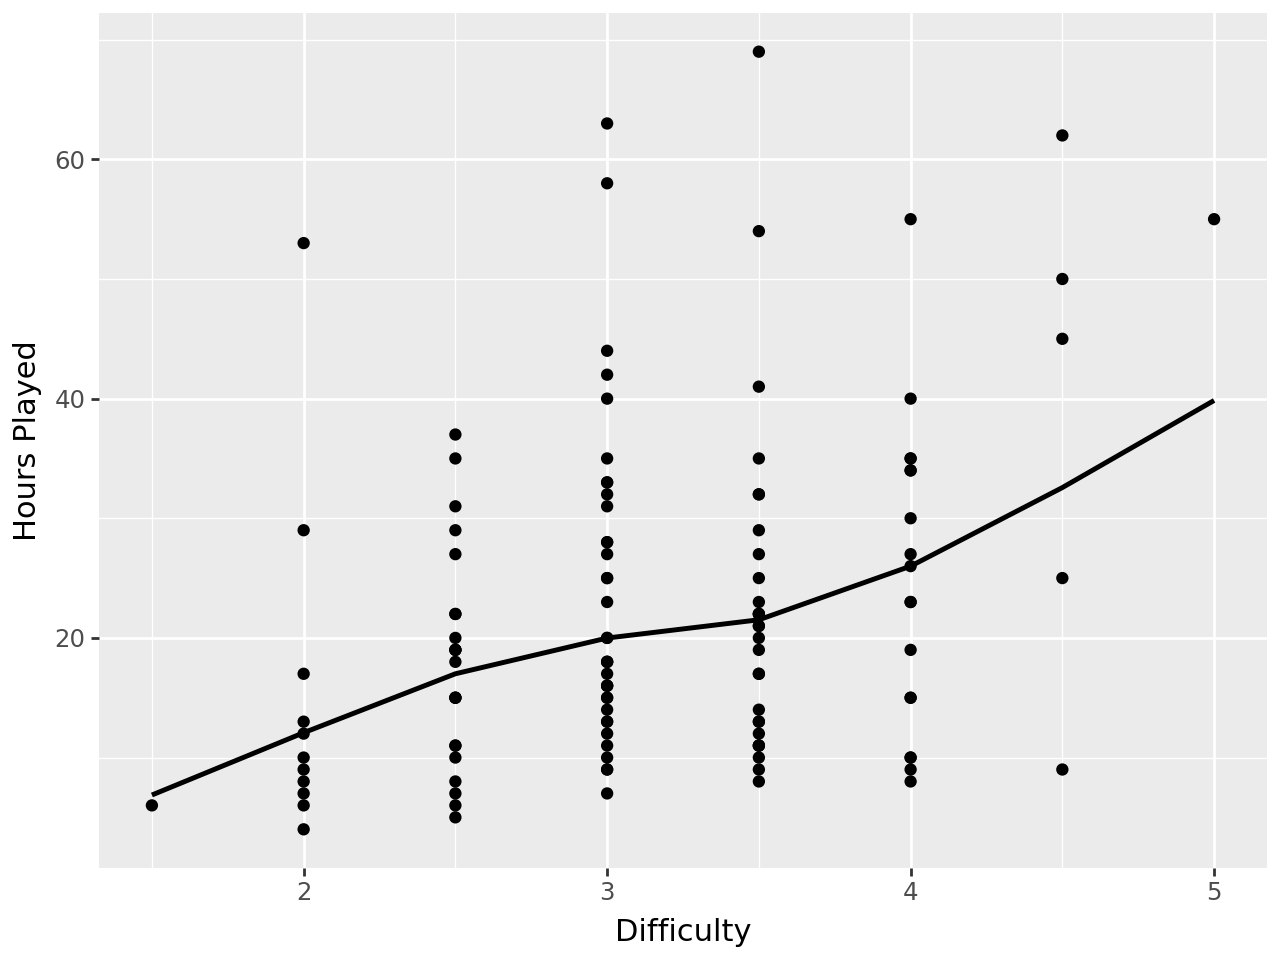

In [846]:
(
    ggplot(crpgScores, aes(x="Difficulty", y="Hours Played"))
    + geom_point()
    + geom_smooth()
    + labs(x="Difficulty", y="Hours Played")
)

Looks like in general, the more difficult the game, the longer it takes to complete. Also, there seems to be a somewhat normal distribution around the average difficulty in regards to final score. So things that are too difficult or too easy tend to get lower scores than a more average difficulty. But there is a significant amount of noise in the data and less than 200 data points.